In [1]:
# Just an example of how to plot some results
library(data.table)
library(survival)
library(ggplot2)
library(scales)
library(Hmisc)
theme_set(theme_bw(20))
library(tidyr)
library(dplyr)
library(plyr)

Warning message:
"package 'survival' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: Formula


ERROR: Error: package or namespace load failed for 'Hmisc' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'latticeExtra'


In [27]:
read_file <- function(dir_name){
print(list.files(path=paste0(dir_name),
                                        pattern="*detail.tsv",
                                        full.names = T))
sim_res2 <- rbindlist(lapply(list.files(path=paste0(dir_name),
                                        pattern="*detail.tsv",
                                        full.names = T),fread))
setnames(sim_res2,c("fem_prom", "fem_suc", "fem_fail","fem_promotion_missed","fem_unfair_promotion_missed","fem_bias",
                    "male_prom","male_suc","male_fail","male_promotion_missed","male_unfair_promotion_missed","male_bias",
                    "n_men","n_women","turn","level_iter","run_number","replication_number"))
params <- fread(paste0(dir_name,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[turn %% 24 == 0]
sim_res2$turn <- sim_res2$turn / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- dir_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}


read_file_Single <- function(dir_name,file_name){
sim_res2 = fread(paste0(dir_name,'/',file_name))
setnames(sim_res2,c("fem_prom", "fem_suc", "fem_fail","fem_promotion_missed","fem_unfair_promotion_missed","fem_bias",
                    "male_prom","male_suc","male_fail","male_promotion_missed","male_unfair_promotion_missed","male_bias",
                    "n_men","n_women","turn","level_iter","run_number","replication_number"))
params <- fread(paste0(dir_name,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[turn %% 24 == 0]
sim_res2$turn <- sim_res2$turn / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- dir_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}


In [28]:
read_each_agent <- function(dir_name,file_name){
sim_res2 = fread(paste0(dir_name,'/',file_name))
setnames(sim_res2,c('agent_id', 'promotion_cycle', 'perceived_promotability', 'num_successful_proj', 'num_failed_proj', 'level_iter','is_male'))
params <- fread(paste0(dir_name,"/experiment_details.csv"))
sim_res2 <- sim_res2[promotion_cycle %% 24 == 0]
sim_res2$promotion_cycle <- sim_res2$promotion_cycle / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}

In [29]:
read_file_promotion_cycle <- function(dir_name){
print(list.files(path=paste0(dir_name),
                                        pattern="*promotion.tsv",
                                        full.names = T))
sim_res2 <- rbindlist(lapply(list.files(path=paste0(dir_name),
                                        pattern="*_promotion.tsv",
                                        full.names = T),fread))
setnames(sim_res2,c("n_men","n_women",'men_leave','women_leave',
                    'men_promoted','women_promoted',"promotion_cycle",
                    "level_iter","run_number","replication_number",'bias_level'))
params <- fread(paste0(dir_name,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[promotion_cycle %% 24 == 0]
sim_res2$promotion_cycle <- sim_res2$promotion_cycle / 24 + 1
sim_res2$type <- dir_name
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}


read_file_promotion_cycle_Single <- function(dir_name,file_name){
sim_res2 = fread(paste0(dir_name,'/',file_name))
setnames(sim_res2,c("n_men","n_women",'men_leave','women_leave',
                    'men_promoted','women_promoted',"promotion_cycle",
                    "level_iter","run_number","replication_number",'bias_level'))
params <- fread(paste0(dir_name,"/experiment_details.csv"))
sim_res2 <- merge(sim_res2,params, by="run_number")
sim_res2 <- sim_res2[promotion_cycle %% 24 == 0]
sim_res2$promotion_cycle <- sim_res2$promotion_cycle / 24 + 1
sim_res2$level_iter <- paste("Level",8-sim_res2$level_iter)
sim_res2$type <- file_name
sim_res2$level_iter <- factor(sim_res2$level_iter,levels=c('Level 8','Level 7','Level 6','Level 5','Level 4',
                                                  'Level 3','Level 2','Level 1'))
return(sim_res2)
}





# Figure 1 and Figure2

In [30]:
noBias <- read_file('./results/NoBias')
Complain <- read_file('./results/Complain')
stretchProject <-  read_file('./results/Stretch')
RewardLess <- read_file('./results/RewardLess')
PenaltyMore <- read_file('./results/PenaltyMore')
MixedRewardLess <- read_file('./results/MixedRewardLess')
MixedPenaltyMore <- read_file('./results/MixedPenaltyMore')
allBias <- read_file('./results/AllBias')


tmp <- rbind(RewardLess,PenaltyMore,noBias,MixedRewardLess,MixedPenaltyMore,Complain,allBias,stretchProject,fill=TRUE)
tmp$type <- factor(tmp$type, 
                   levels = c("./results/NoBias","./results/Complain","./results/Stretch","./results/MixedPenaltyMore",
                              "./results/MixedRewardLess","./results/PenaltyMore","./results/RewardLess","./results/AllBias"))





tmp$type_name <- mapvalues(tmp$type, c("./results/NoBias",
                                       "./results/Complain",
                                       "./results/Stretch",
                                      "./results/MixedPenaltyMore",
                                      "./results/MixedRewardLess",
                                      "./results/PenaltyMore",
                                      "./results/RewardLess",
                                      "./results/AllBias"),
                          c("No Biases",
                           "Penalty\nNon-Altruism",
                                "Penalty\nStretch\nProject",
                           "Penalty\nMixed Group\nFailure",
                           "Reward\nMixed Group\nSucces",
                           "Penalty\nIndividual\nFailure",
                           "Reward\nIndividual\nSuccess",
                           "All Biases"))



[1] "./results/NoBias/NoBias0_detail.tsv"
[1] "./results/Complain/Complain0_detail.tsv"
[1] "./results/Stretch/Stretch0_detail.tsv"
[1] "./results/RewardLess/RewardLess0_detail.tsv"
[1] "./results/PenaltyMore/PenaltyMore0_detail.tsv"
[1] "./results/MixedRewardLess/MixedRewardLess0_detail.tsv"
[1] "./results/MixedPenaltyMore/MixedPenaltyMore0_detail.tsv"
[1] "./results/AllBias/AllBias0_detail.tsv"


ERROR: Error in mapvalues(tmp$type, c("./results/NoBias", "./results/Complain", : could not find function "mapvalues"


In [ ]:


w = 13.5
h=4
options(repr.plot.width = w, repr.plot.height = h)
p <- ggplot(tmp,aes(turn,n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun="mean",geom="line",size=1.2)  + 
    geom_hline(yintercept = .5) + 
    scale_y_continuous("% Men", labels=percent) + 
    xlab("Promotion Cycle") + 
    facet_grid(~type_name)+ 
    scale_color_discrete("Level of\nCorporate\nHierarchy")+
    theme(strip.text.x= element_text(size=13),plot.margin = margin(1.5,0.5,0.5,1.0,unit = 'cm'))
# p <- p + scale_x_continuous(limits=c(1,10),breaks=c(1,2,4,6,8,10))
p
# ggsave('/home/yuhaodu/workplace_gender_repo/image/AccBias.pdf',width =w,height=h)
options(repr.plot.width = w, repr.plot.height = h)
p <- ggplot(tmp[fem_bias!=-1],aes(turn,fem_bias,color=level_iter)) +
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun.y="mean",geom="line",size=1.2)  + 
    geom_hline(yintercept = 0) +
     scale_y_continuous("Avg. Num.\n Biases Women\nEncounter") + 
    xlab("Promotion Cycle")+ 
 facet_grid(~type_name)+ 
scale_color_discrete("Level of\nCorporate\nHierarchy") +
    theme(strip.text.x= element_text(size=13), plot.margin = margin(1,0.5,0.5,0.1,unit = 'cm') )
p
# ggsave('/home/yuhaodu/workplace_gender_repo/image/NumBias.pdf',width =w,height=h)

In [ ]:
w = 10
h=4
options(repr.plot.width = w, repr.plot.height = h)
tmp <- rbind(RewardLess,noBias,allBias,fill=T)
tmp$type <- factor(tmp$type, levels = c("Jess_0.03_NoBias","Jess_0.03_RewardLess","Jess_0.03_AllBias"),
                  labels=c("No Biases",
                           "Reward\nIndividual Success",
                           "All Biases"))
tmp$fem_diff <- tmp$fem_suc - tmp$fem_fail
tmp$male_diff <- tmp$male_suc - tmp$male_fail
tmp$level_iter <- factor(tmp$level_iter,levels=c('Level 1','Level 2','Level 3','Level 4','Level 5',
                                                  'Level 6','Level 7','Level 8'), labels=1:8)
#melt(tmp,id=c('level_iter','type','run_number'),measure=c("fem_diff","male_diff"))[value!=-1]
p <- ggplot(melt(tmp[fem_bias!=-1],id=c('level_iter','type','replication_number','turn'),
                 measure=c("fem_diff","male_diff"))[value!=-1 & turn == 20]) +
 stat_summary(aes(x=level_iter,y=value,color=variable),fun.data="mean_cl_normal") +
stat_summary(aes(x=level_iter,y=value,group=variable,color = variable),fun.y="mean",geom="line",size=1.2) +
    geom_hline(yintercept = 0)+
scale_y_continuous("Num of Succ Projects -\nNum of Failed Projects") + xlab("Level")+
theme(strip.text.x= element_text(size=12))+
facet_grid(~type)+ 
scale_color_discrete("Gender", labels=c("Women","Men")) 

p
# ggsave('/home/yuhaodu/workplace_gender_repo/image/DiffBias.pdf',width =w,height=h)



# Figure 3

[1] "./results/weight/weight0_promotion.tsv"
[2] "./results/weight/weight1_promotion.tsv"
[3] "./results/weight/weight2_promotion.tsv"
[4] "./results/weight/weight3_promotion.tsv"
[5] "./results/weight/weight4_promotion.tsv"
[6] "./results/weight/weight5_promotion.tsv"


Warning message:
"Computation failed in `stat_summary()`:
Hmisc package required for this function"Warning message:
"Computation failed in `stat_summary()`:
Hmisc package required for this function"Warning message:
"Computation failed in `stat_summary()`:
Hmisc package required for this function"Warning message:
"Computation failed in `stat_summary()`:
Hmisc package required for this function"Warning message:
"Computation failed in `stat_summary()`:
Hmisc package required for this function"Warning message:
"Computation failed in `stat_summary()`:
Hmisc package required for this function"

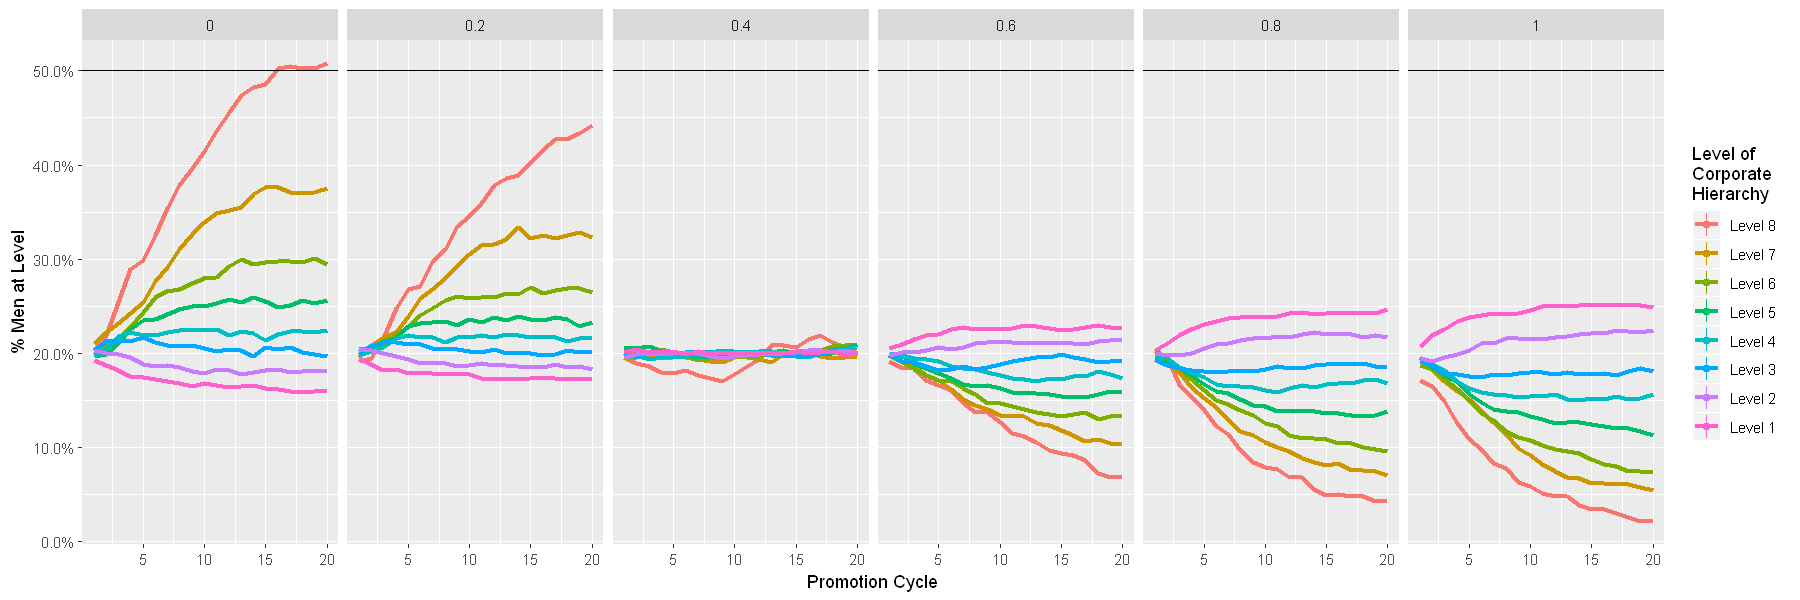

In [24]:
w =15
h= 5
options(repr.plot.width = w, repr.plot.height = h)
weight <- read_file_promotion_cycle('./results/weight')
weight$weight = as.character(weight$weight)
p <- ggplot(weight[weight != "without"],aes(promotion_cycle,n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data="mean_cl_normal",size = 0.3) + 
    stat_summary(fun.y="mean",geom="line",size=1.2) + 
    geom_hline(yintercept = .5) +
    scale_y_continuous("% Men at Level", labels=percent) + 
    xlab("Promotion Cycle") +
    scale_color_discrete("Level of\nCorporate\nHierarchy") +
    facet_grid(~weight) 

p


# Figure 4

In [ ]:
h=5
w=15
intervention <- read_file_promotion_cycle('./results/intervention')
intervention[ , promotion_interv := factor(promotion_intervention_span,
                                          levels=c('[168, 240]',
                                                   '[168, 312]',
                                                   '[168, 384]'),
                                          labels=c("3 Prom. Cycles","6 Prom. Cycles","9 Prom. Cycles"))]
intervention[ , promotion_norm := factor(promotion_intervention_norm,
                                          levels=c(0.4,
                                                   0.7,
                                                   1),
                                          labels=c("Moderate\nMacro Norms",
                                                   "Low\nMacro Norms",
                                                   "No\nMacro Norms"))]
intervention <- intervention[promotion_interv == '6 Prom. Cycles']
g <- ggplot(intervention[promotion_cycle <=75],aes(x=promotion_cycle,y=n_men/(n_men+n_women),color=level_iter)) + 
    stat_summary(fun.data = "mean_cl_normal",size = 0.3) + 
    stat_summary(fun.y='mean',geom='line',size=1.2) + 
    geom_hline(yintercept=0.5) +
    scale_y_continuous("% Men at Level",labels = percent) + 
    xlab("Promotion Cycle") +
    facet_grid(promotion_interv~promotion_norm) +
    scale_color_discrete("Level of\nCorporate\nHierarchy") +
    geom_vline(xintercept = 7, size=1.2,linetype="dashed",color="darkgrey")
options(repr.plot.width = w, repr.plot.height = h)
g
